In [201]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Define the directories
train_dir = 'C:/Users/timot/Documents/Projet/ia/chest_Xray/chest_Xray/train'
test_dir = 'C:/Users/timot/Documents/Projet/ia/chest_Xray/chest_Xray/test'

# Define the image size
img_size = (224, 224)

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label) 
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file)
                if file.endswith('.jpeg'):
                    img = image.load_img(file_path, target_size=img_size)
                    img_array = image.img_to_array(img)
                    images.append(img_array)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load the training images and labels
train_images, train_labels = load_images_from_directory(train_dir)

# Load the testing images and labels
test_images, test_labels = load_images_from_directory(test_dir)

# Flatten the image arrays
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Split the training data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [302]:
import matplotlib.pyplot as plt

def plot_acc_array(val_acc_list, test_acc_list, index, file, xlabel, title):
    plt.figure(figsize=(16,10))

    plt.plot(index, val_acc_list, label='Validation Accuracy')
    plt.plot(index, test_acc_list, label='Testing Accuracy')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend()
    if index != 0 :
        plt.xticks(index)
    plt.ylim([0.5,1])
    plt.grid(True, axis='y')
    plt.savefig('images/randomForest/'+file)
    
def plot_acc_arrays(val_acc_list, test_acc_list, index, file, xlabel, title, starting_max_depth):
    plt.figure(figsize=(16,10))

    max_depth = starting_max_depth
    for val_acc in val_acc_list:
        plt.plot(index, val_acc, label='Testing Accuracy max_depth: '+ str(max_depth))
        max_depth += 1
    
    for test_acc in test_acc_list:
        plt.plot(index, test_acc, label='Testing Accuracy max_depth: '+ str(max_depth))
        max_depth += 1
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend()
    if index != 0 :
        plt.xticks(index)
    plt.ylim([0.5,1])
    plt.grid(True, axis='y')
    plt.savefig('images/randomForest/'+file)

def plot_average_acc_arrays(val_acc_list, test_acc_list, index, file, xlabel, title, starting_n_estimators):
    plt.figure(figsize=(16,10))

    n_estimators = starting_n_estimators
    for val_acc in val_acc_list:
        plt.plot(index, val_acc, label='Testing Accuracy n_estimators: '+ str(n_estimators))
        n_estimators += 1
    
    for test_acc in test_acc_list:
        plt.plot(index, test_acc, label='Testing Accuracy n_estimators: '+ str(n_estimators))
        n_estimators += 1
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend()
    if index != 0 :
        plt.xticks(index)
    plt.ylim([0.5,1])
    plt.grid(True, axis='y')
    plt.savefig('images/randomForest/'+file)

In [159]:
# Create and train the RandomForest classifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(train_images, train_labels)

RandomForestClassifier(n_estimators=50)

In [160]:
accuracy = clf.score(val_images, val_labels)
print("Validation Accuracy:", accuracy)

# Make predictions on the testing set
predictions = clf.predict(test_images)

# Evaluate the model on the testing set
test_accuracy = clf.score(test_images, test_labels)
print("Testing Accuracy:", test_accuracy)

Validation Accuracy: 0.9501915708812261
Testing Accuracy: 0.7548076923076923


In [118]:
index = []
val_acc = []
test_acc = []
startint_estimators = 0
n_estimators = startint_estimators
for i in range (10) :
    n_estimators = (i+1)*10;
    print(n_estimators)
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=80)
    clf.fit(train_images, train_labels)
    # Evaluate the model on the validation set
    accuracy = clf.score(val_images, val_labels)
    print("Validation Accuracy:", accuracy)

    # Make predictions on the testing set
    predictions = clf.predict(test_images)

    # Evaluate the model on the testing set
    test_accuracy = clf.score(test_images, test_labels)
    print("Testing Accuracy:", test_accuracy)
    
    index.append(n_estimators)
    val_acc.append(accuracy)
    test_acc.append(test_accuracy)


10
Validation Accuracy: 0.935823754789272
Testing Accuracy: 0.7403846153846154
20
Validation Accuracy: 0.9511494252873564
Testing Accuracy: 0.7596153846153846
30
Validation Accuracy: 0.9482758620689655
Testing Accuracy: 0.7548076923076923
40
Validation Accuracy: 0.9530651340996169
Testing Accuracy: 0.7483974358974359
50
Validation Accuracy: 0.9521072796934866
Testing Accuracy: 0.7596153846153846
60
Validation Accuracy: 0.9521072796934866
Testing Accuracy: 0.7532051282051282
70
Validation Accuracy: 0.9521072796934866
Testing Accuracy: 0.7467948717948718
80
Validation Accuracy: 0.9492337164750958
Testing Accuracy: 0.7403846153846154
90
Validation Accuracy: 0.9492337164750958
Testing Accuracy: 0.7403846153846154
100
Validation Accuracy: 0.9549808429118773
Testing Accuracy: 0.7451923076923077


[0.7403846153846154, 0.7596153846153846, 0.7548076923076923, 0.7483974358974359, 0.7596153846153846, 0.7532051282051282, 0.7467948717948718, 0.7403846153846154, 0.7403846153846154, 0.7451923076923077]
0.7596153846153846


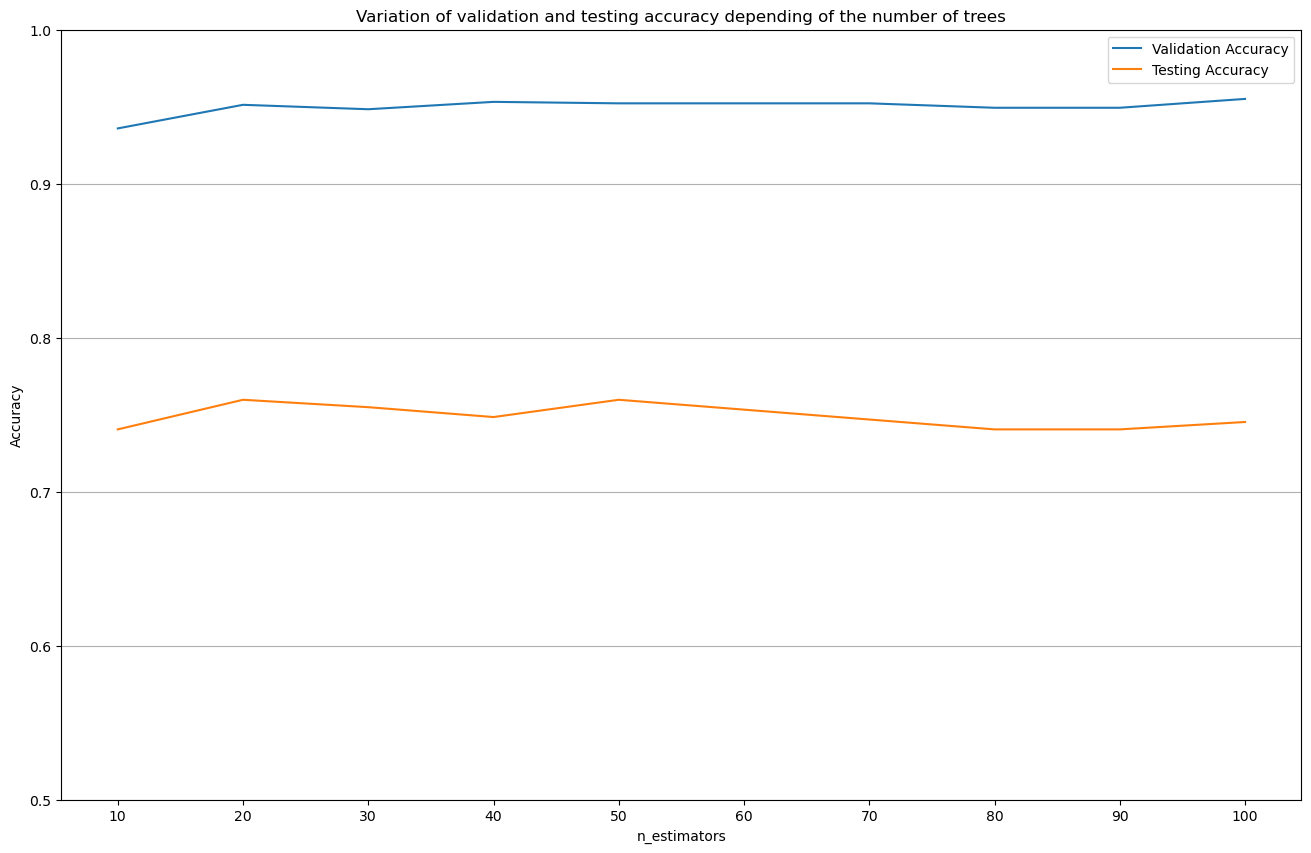

In [120]:
plot_acc_arrays(val_acc, test_acc, index, '10_to_100_estimators_without_fix_depth_gini_3', 'n_estimators', 'Variation of validation and testing accuracy depending of the number of trees')
print(test_acc)
print(max(test_acc))

In [98]:
index = []
val_acc = []
test_acc = []
startint_estimators = 20
n_estimators = startint_estimators
for i in range (21) :
    print(n_estimators)
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=100)
    clf.fit(train_images, train_labels)
    # Evaluate the model on the validation set
    accuracy = clf.score(val_images, val_labels)
    print("Validation Accuracy:", accuracy)

    # Make predictions on the testing set
    predictions = clf.predict(test_images)

    # Evaluate the model on the testing set
    test_accuracy = clf.score(test_images, test_labels)
    print("Testing Accuracy:", test_accuracy)
    
    index.append(n_estimators)
    val_acc.append(accuracy)
    test_acc.append(test_accuracy)
    n_estimators += 1;

20
Validation Accuracy: 0.935823754789272
Testing Accuracy: 0.7532051282051282
21
Validation Accuracy: 0.9339080459770115
Testing Accuracy: 0.7339743589743589
22
Validation Accuracy: 0.9377394636015326
Testing Accuracy: 0.7483974358974359
23
Validation Accuracy: 0.935823754789272
Testing Accuracy: 0.7371794871794872
24
Validation Accuracy: 0.9406130268199234
Testing Accuracy: 0.7467948717948718
25
Validation Accuracy: 0.9377394636015326
Testing Accuracy: 0.7355769230769231
26
Validation Accuracy: 0.9367816091954023
Testing Accuracy: 0.7467948717948718
27
Validation Accuracy: 0.935823754789272
Testing Accuracy: 0.7419871794871795
28
Validation Accuracy: 0.9406130268199234
Testing Accuracy: 0.7451923076923077
29
Validation Accuracy: 0.9377394636015326
Testing Accuracy: 0.7451923076923077
30
Validation Accuracy: 0.9425287356321839
Testing Accuracy: 0.7548076923076923
31
Validation Accuracy: 0.9444444444444444
Testing Accuracy: 0.7451923076923077
32
Validation Accuracy: 0.9501915708812261


[0.7532051282051282, 0.7339743589743589, 0.7483974358974359, 0.7371794871794872, 0.7467948717948718, 0.7355769230769231, 0.7467948717948718, 0.7419871794871795, 0.7451923076923077, 0.7451923076923077, 0.7548076923076923, 0.7451923076923077, 0.7516025641025641, 0.7467948717948718, 0.7532051282051282, 0.75, 0.7532051282051282, 0.7483974358974359, 0.7548076923076923, 0.7451923076923077, 0.75]
0.7548076923076923


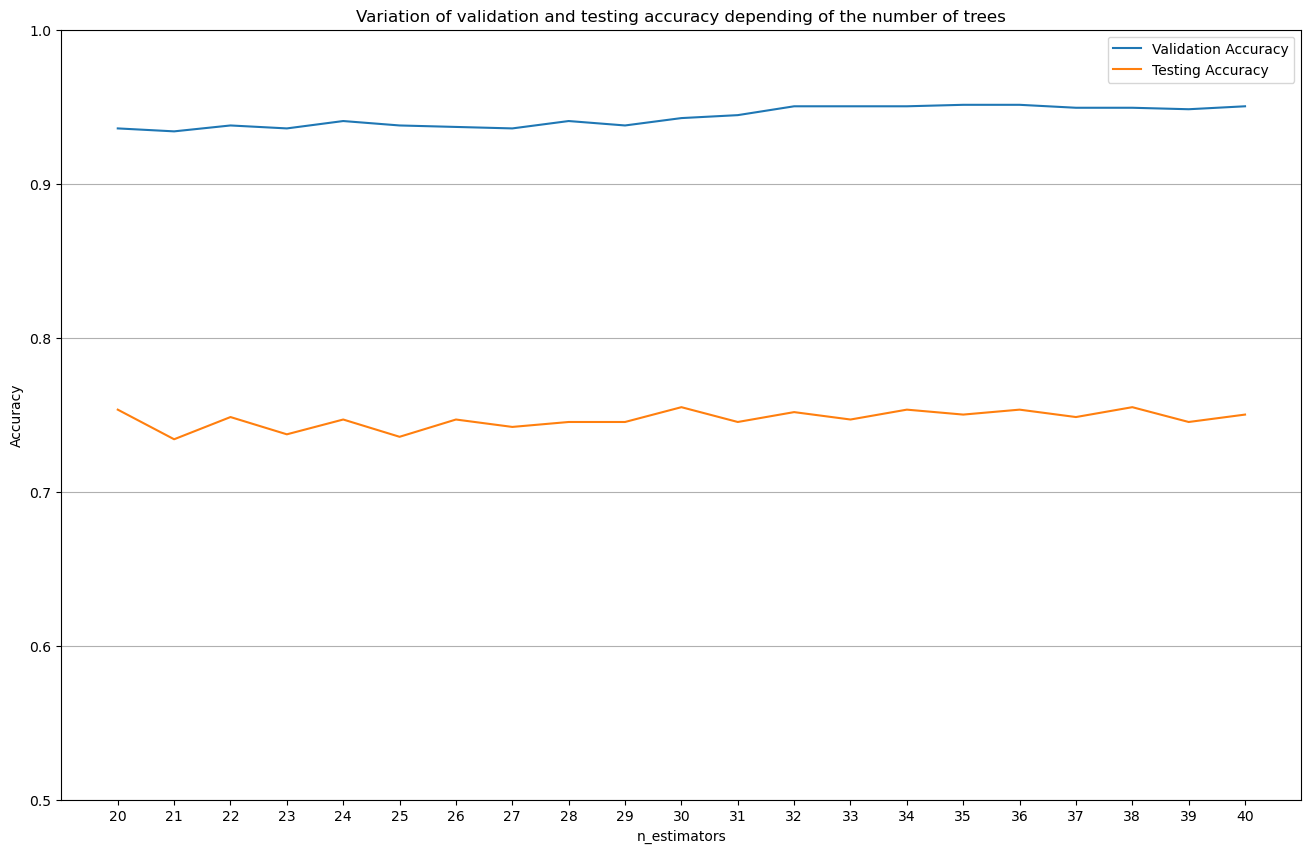

In [101]:
plot_acc_arrays(val_acc, test_acc, index, '20_to_40_estimators_without_fix_depth_gini', 'n_estimators', 'Variation of validation and testing accuracy depending of the number of trees')
print(test_acc)
print(max(test_acc)

In [ ]:
index = []
val_acc = []
test_acc = []
starting_max_depth = 1
max_depth = starting_max_depth
for i in range (20) :
    print(max_depth)
    clf = RandomForestClassifier(n_estimators=30, max_depth=max_depth, random_state=90)
    clf.fit(train_images, train_labels)
    # Evaluate the model on the validation set
    accuracy = clf.score(val_images, val_labels)
    print("Validation Accuracy:", accuracy)

    # Make predictions on the testing set
    predictions = clf.predict(test_images)

    # Evaluate the model on the testing set
    test_accuracy = clf.score(test_images, test_labels)
    print("Testing Accuracy:", test_accuracy)
    
    index.append(max_depth)
    val_acc.append(accuracy)
    test_acc.append(test_accuracy)
    max_depth += 1;

In [ ]:
plot_acc_arrays(val_acc, test_acc, index, '1_to_20_max_depth', 'max_depth', 'Variation of validation and testing accuracy depending of the max depth of each of trees')
print(max(test_acc))

In [112]:
index = []
val_acc = []
test_acc = []
starting_min_samples_split = 1
min_samples_split = starting_min_samples_split
for i in range (10) :
    print(min_samples_split)
    clf = RandomForestClassifier(n_estimators=30, min_samples_split=min_samples_split, random_state=90)
    clf.fit(train_images, train_labels)
    # Evaluate the model on the validation set
    accuracy = clf.score(val_images, val_labels)
    print("Validation Accuracy:", accuracy)

    # Make predictions on the testing set
    predictions = clf.predict(test_images)

    # Evaluate the model on the testing set
    test_accuracy = clf.score(test_images, test_labels)
    print("Testing Accuracy:", test_accuracy)
    
    index.append(min_samples_split)
    val_acc.append(accuracy)
    test_acc.append(test_accuracy)
    min_samples_split += 1;

1
Validation Accuracy: 0.9501915708812261
Testing Accuracy: 0.7516025641025641
2
Validation Accuracy: 0.9501915708812261
Testing Accuracy: 0.7516025641025641
3
Validation Accuracy: 0.9425287356321839
Testing Accuracy: 0.7435897435897436
4
Validation Accuracy: 0.9434865900383141
Testing Accuracy: 0.7532051282051282
5
Validation Accuracy: 0.946360153256705
Testing Accuracy: 0.7451923076923077
6
Validation Accuracy: 0.9377394636015326
Testing Accuracy: 0.7451923076923077
7
Validation Accuracy: 0.946360153256705
Testing Accuracy: 0.7516025641025641
8
Validation Accuracy: 0.9396551724137931
Testing Accuracy: 0.7483974358974359
9
Validation Accuracy: 0.946360153256705
Testing Accuracy: 0.7660256410256411
10
Validation Accuracy: 0.9415708812260536
Testing Accuracy: 0.7564102564102564


[0.7516025641025641, 0.7516025641025641, 0.7435897435897436, 0.7532051282051282, 0.7451923076923077, 0.7451923076923077, 0.7516025641025641, 0.7483974358974359, 0.7660256410256411, 0.7564102564102564]
0.7660256410256411


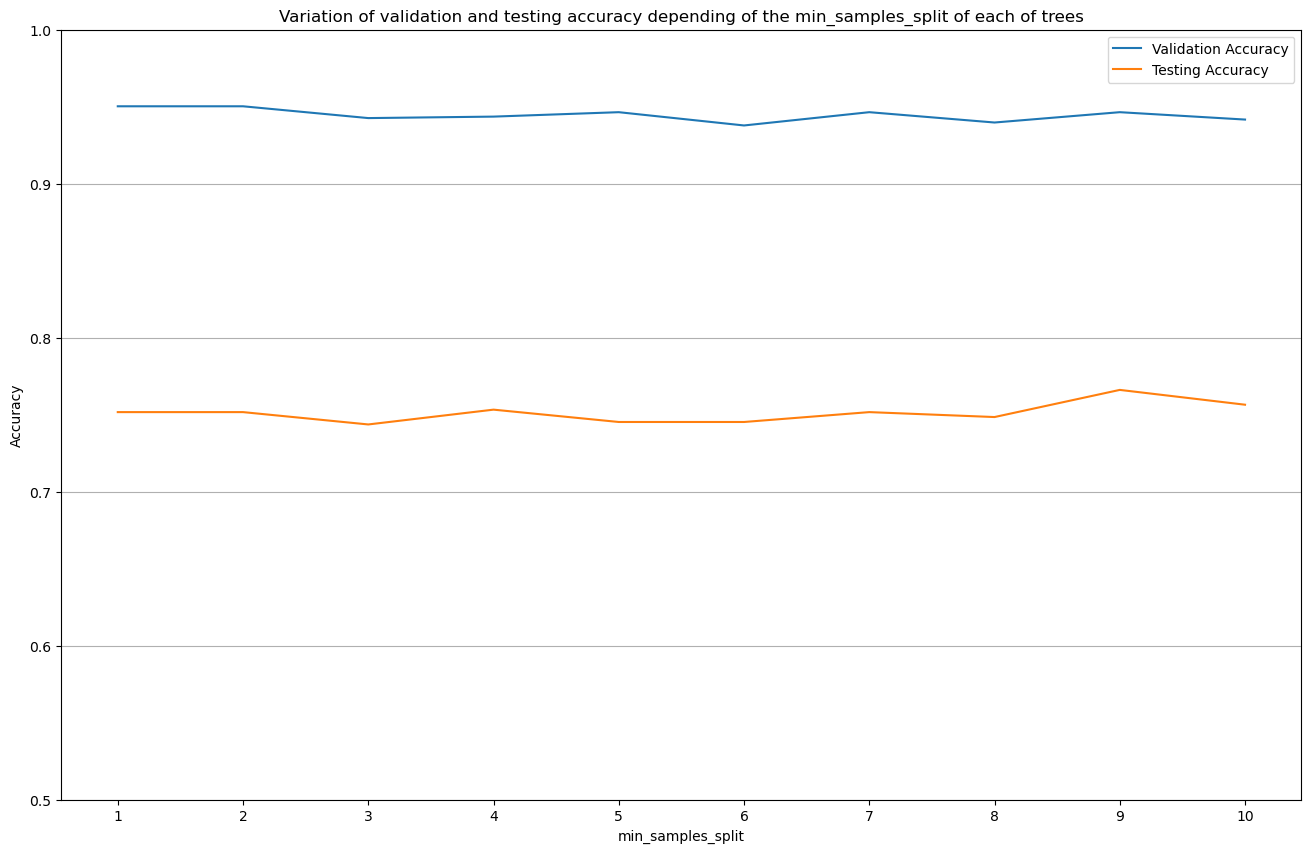

In [114]:
plot_acc_arrays(val_acc, test_acc, index, '1_to_10_min_samples_split_2', 'min_samples_split', 'Variation of validation and testing accuracy depending of the min_samples_split of each of trees')
print(test_acc)
print(max(test_acc))

In [254]:
index_md = []
val_acc_md = []
test_acc_md = []

starting_min_samples_split = 2
starting_max_depth = 15
max_depth = starting_max_depth
for i in range (5) :
    index_ms = []
    val_acc_ms = []
    test_acc_ms = []
    min_samples_split = starting_min_samples_split
    for i in range (10) :
        print('min_samples_split: ' + str(min_samples_split))
        print('max_depth: ' + str(max_depth))
        clf = RandomForestClassifier(n_estimators=10, max_depth=max_depth, min_samples_split=min_samples_split, random_state=90)
        clf.fit(train_images, train_labels)
        
        # Evaluate the model on the validation set
        accuracy = clf.score(val_images, val_labels)
        print("Validation Accuracy:", accuracy)

        # Make predictions on the testing set
        predictions = clf.predict(test_images)

        # Evaluate the model on the testing set
        test_accuracy = clf.score(test_images, test_labels)
        print("Testing Accuracy:", test_accuracy)

        index_ms.append(min_samples_split)
        val_acc_ms.append(accuracy)
        test_acc_ms.append(test_accuracy)
        min_samples_split += 1;
        
    index_md.append(max_depth)
    val_acc_md.append(val_acc_ms)
    test_acc_md.append(test_acc_ms)
    max_depth += 1

min_samples_split: 2
max_depth: 15
Validation Accuracy: 0.9473180076628352
Testing Accuracy: 0.7644230769230769
min_samples_split: 3
max_depth: 15
Validation Accuracy: 0.9377394636015326
Testing Accuracy: 0.7483974358974359
min_samples_split: 4
max_depth: 15
Validation Accuracy: 0.9310344827586207
Testing Accuracy: 0.7355769230769231
min_samples_split: 5
max_depth: 15
Validation Accuracy: 0.9300766283524904
Testing Accuracy: 0.7564102564102564
min_samples_split: 6
max_depth: 15
Validation Accuracy: 0.9329501915708812
Testing Accuracy: 0.7548076923076923
min_samples_split: 7
max_depth: 15
Validation Accuracy: 0.9339080459770115
Testing Accuracy: 0.7419871794871795
min_samples_split: 8
max_depth: 15
Validation Accuracy: 0.9319923371647509
Testing Accuracy: 0.7483974358974359
min_samples_split: 9
max_depth: 15
Validation Accuracy: 0.9329501915708812
Testing Accuracy: 0.7435897435897436
min_samples_split: 10
max_depth: 15
Validation Accuracy: 0.9329501915708812
Testing Accuracy: 0.75320512

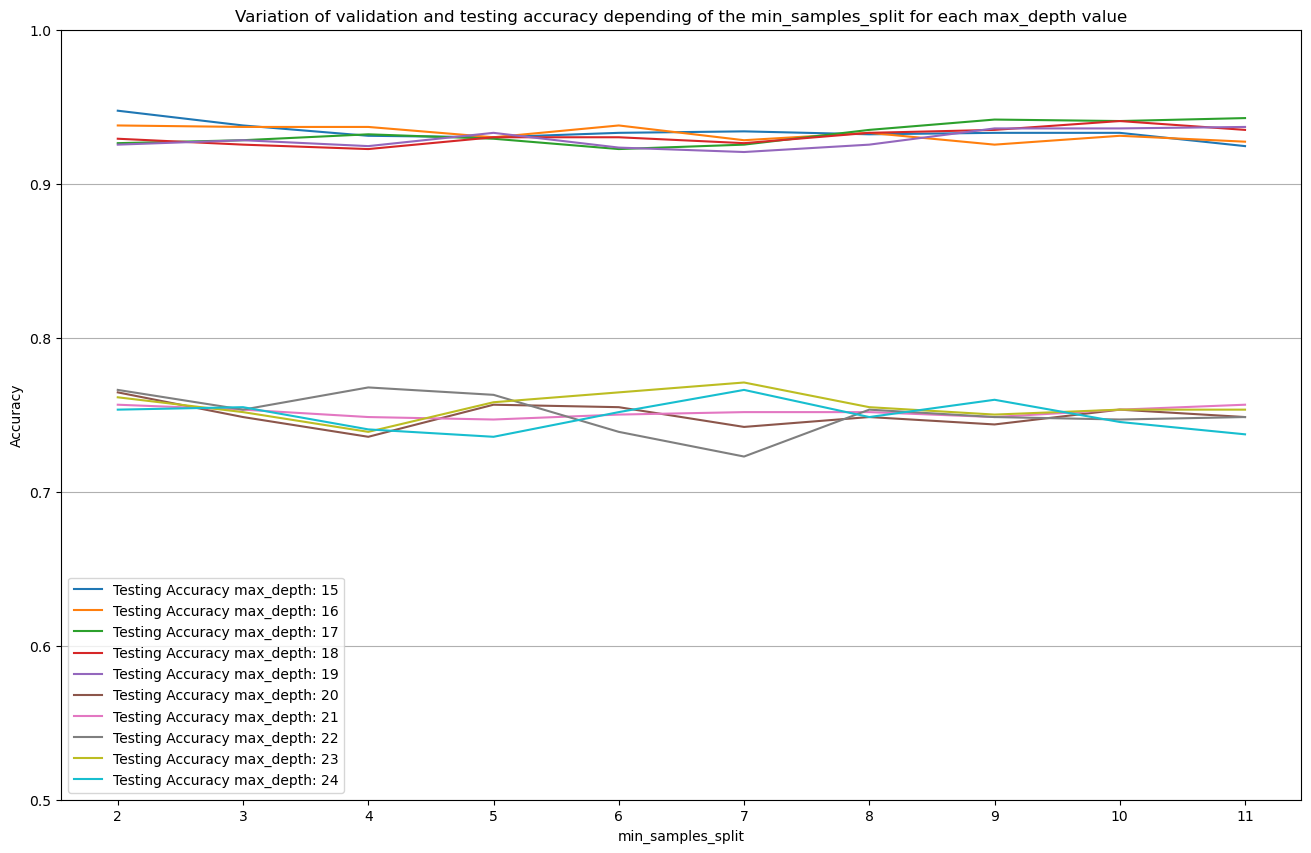

In [255]:
plot_acc_arrays(val_acc_md, test_acc_md, index_ms, 'max_depth_min_samples_split/min_samples_split_x_max_depth_2', 'min_samples_split', 'Variation of validation and testing accuracy depending of the min_samples_split for each max_depth value', starting_max_depth)

In [288]:
def get_average_acc(n_estimators, n):
    val_acc = []
    test_acc = []
    model_history = []
    models = []
    for i in range (n) :
        models.append(RandomForestClassifier(n_estimators=n_estimators))
        models[i].fit(train_images, train_labels)
        # Evaluate the model on the validation set
        accuracy = models[i].score(val_images, val_labels)

        # Make predictions on the testing set
        predictions = models[i].predict(test_images)

        # Evaluate the model on the testing set
        test_accuracy = models[i].score(test_images, test_labels)

        model_history.append({
            'model': models[i],
            'val_acc': accuracy,
            'test_acc': test_accuracy
        })
        index.append(n_estimators)
        val_acc.append(accuracy)
        test_acc.append(test_accuracy)
        max_acc = 0
    
    print('N_estimators: '+ str(n_estimators))
    
    moy_val_acc = sum(val_acc)/len(val_acc)
    print('Average validation accuracy: ' + str(moy_val_acc))
    
    moy_test_acc = sum(test_acc)/len(test_acc)
    print('Average testing accuracy: ' + str(moy_test_acc))
    
    for model in model_history :
        if(model['test_acc'] > max_acc):
            max_acc_model = model
            max_acc = model['test_acc']
    print('Max accuracy:' + str(max_acc))
    
    return (model_history, moy_val_acc, moy_test_acc, max_acc_model)

In [292]:
history_average_val_acc = []
history_average_test_acc = []
history_max_test_acc = []
index = []
starting_n_estimators = 1
n_estimators = starting_n_estimators
for i in range (20):
    (model_history, moy_val_acc, moy_test_acc, max_acc_model) = get_average_acc(n_estimators, 10)

    history_average_val_acc.append(moy_val_acc)
    history_average_test_acc.append(moy_test_acc)
    history_max_test_acc.append(max_acc_model)
    index.append(n_estimators)
    n_estimators += 1
    print('----------------------------------------------')
print('**************************************')

print(history_average_test_acc)
print(history_max_test_acc)

N_estimators: 1
Average validation accuracy: 0.8633141762452109
Average testing accuracy: 0.733173076923077
Max accuracy:0.7644230769230769
----------------------------------------------
N_estimators: 2
Average validation accuracy: 0.8638888888888892
Average testing accuracy: 0.7700320512820512
Max accuracy:0.7884615384615384
----------------------------------------------
N_estimators: 3
Average validation accuracy: 0.9032567049808428
Average testing accuracy: 0.742948717948718
Max accuracy:0.7660256410256411
----------------------------------------------
N_estimators: 4
Average validation accuracy: 0.910249042145594
Average testing accuracy: 0.7676282051282051
Max accuracy:0.7916666666666666
----------------------------------------------
N_estimators: 5
Average validation accuracy: 0.9161877394636017
Average testing accuracy: 0.7434294871794873
Max accuracy:0.7788461538461539
----------------------------------------------
N_estimators: 6
Average validation accuracy: 0.9238505747126438

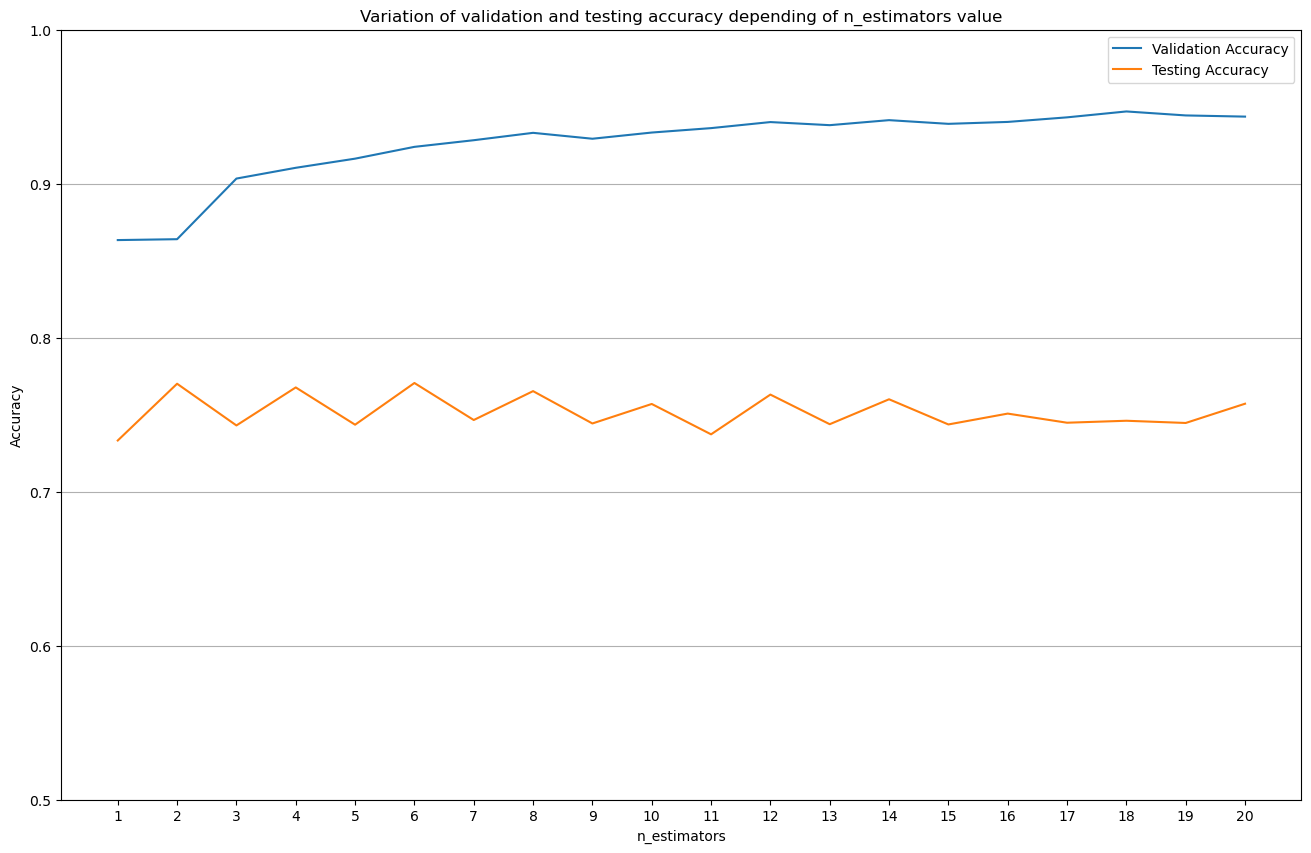

In [306]:
index = []
for i in range (20):
    index.append(i+1)
plot_acc_array(history_average_val_acc, history_average_test_acc, index, 'acc_n_estimators_1_to_20', 'n_estimators', 'Variation of validation and testing accuracy depending of n_estimators value')

In [315]:
max_acc_list = []
for element in history_max_test_acc:
    max_acc_list.append(element['test_acc'])
print(max_acc_list)
max_acc = np.max(max_acc_list)
max_average_acc = np.max(history_average_test_acc)
index_max_average = history_average_test_acc.index(max_average_acc)
print('Moyenne maximal précision atteinte : ' + str(max_average_acc) + ' pour n_estimators = ' + str(index_max_average+1))
index_max_model = max_acc_list.index(max_acc)
print('Précision maximal atteinte : ' + str(max_acc) + ' pour n_estimators = ' + str(index_max_average+1))

print(history_max_test_acc[index_max_model])
le_meilleur_model = history_max_test_acc[index_max_model]

[0.7644230769230769, 0.7884615384615384, 0.7660256410256411, 0.7916666666666666, 0.7788461538461539, 0.7900641025641025, 0.7644230769230769, 0.7852564102564102, 0.7660256410256411, 0.7660256410256411, 0.7483974358974359, 0.7900641025641025, 0.7676282051282052, 0.7724358974358975, 0.7564102564102564, 0.7708333333333334, 0.7660256410256411, 0.7628205128205128, 0.7628205128205128, 0.782051282051282]
Moyenne maximal précision atteinte : 0.7705128205128206 pour n_estimators = 6
Précision maximal atteinte : 0.7916666666666666 pour n_estimators = 6
{'model': RandomForestClassifier(n_estimators=4), 'val_acc': 0.9128352490421456, 'test_acc': 0.7916666666666666}


In [ ]:
predictions = le_meilleur_model['model'].predict(test_images)
test_accuracy = le_meilleur_model['model'].score(test_images, test_labels)
print("Expected Accuray:", le_meilleur_model['test_acc'])
print("Testing Accuracy:", test_accuracy)
print(predictions)

NameError: name 'le_meilleur_model' is not defined